In [1]:
import numpy as np
import matplotlib.pyplot as plt
from edibles import PYTHONDIR
from astropy.modeling.functional_models import Voigt1D
import copy
from stackingFunctions import widthNormLinStacker
from stackingFunctions import stackCheck
from peakBasedFunctions import voigtUniPeak

C:\Users\hkhan\AppData\Local\Temp\ipykernel_18120\969147885.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


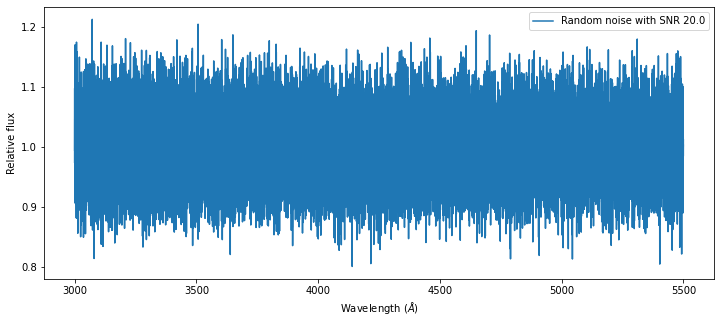

In [31]:
SNR = 20.0
signal = 1.0
minWave = 3000.0
maxWave = 5500.0

reso = 70000.0

currX = minWave
x = np.array([minWave])

while currX < maxWave:
    currX = currX + currX/reso
    x = np.append(x, currX)

#x = np.linspace(3000.0, 5500.0, 100000)
y = np.random.normal(signal, 1/SNR, x.shape)

fig1, ax1 = plt.subplots(figsize = (12,5))

ax1.plot(x, y, label = 'Random noise with SNR ' + str(SNR))
ax1.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Relative flux')
ax1.legend()
#plt.close(fig1)
fig1.show()
#plt.close(fig1)

In [27]:
print(np.std(y))

0.0010003697634382374


In [16]:
#select molecule as follows -
# 2-Methylnaphthalene -> 1
# Acenaphthene -> 2
# Benzo[ghi]perylene -> 3
# Pentacene -> 4
# Perylene -> 5
# Phenanthrene -> 6
# Pyrene -> 7
# Phenalenyl -> 8
# Any other molecule -> 0 and input the molecule name (according to parameters file)
moleculeNo = 5

#getting molecule name from given molecule number above
#if on jupyter, just run this part

if moleculeNo == 1:
    molName = '2MethylNaphthalene'
elif moleculeNo == 2:
    molName = 'Acenaphthene'
elif moleculeNo == 3:
    molName = 'Benzoghiperylene'
elif moleculeNo == 4:
    molName = 'Pentacene'
elif moleculeNo == 5:
    molName = 'Perylene'
elif moleculeNo == 6:
    molName = 'Phenanthrene'
elif moleculeNo == 7:
    molName = 'Pyrene'
elif moleculeNo == 8:
    molName = 'Phenalenyl'
elif moleculeNo == 0:
    molName = input('Enter molecule file name (as in parameters file):\n')

In [17]:
#loading the parameters of the given molecule
#if on jupyter, just run this part

paramFile = PYTHONDIR + '\\utils\\Harshit\\Lab Spectra Parameters\\' + molName + 'Params.txt'
molParam = np.loadtxt(paramFile)
P = molParam.shape[0]

In [18]:
print(molParam)

[[4.02235681e+03 4.34036168e-01]
 [4.02505177e+03 3.26686765e-01]
 [4.03015492e+03 4.90781127e-01]
 [4.03349402e+03 4.69368559e-01]
 [4.03709484e+03 4.41464164e-01]
 [4.05552444e+03 4.99026296e-01]
 [4.05893434e+03 4.48412083e-01]
 [4.06265237e+03 4.50312024e-01]
 [4.07194068e+03 4.58866147e-01]
 [4.07561299e+03 4.37818883e-01]
 [4.07939020e+03 5.49952214e-01]
 [4.08304284e+03 4.19109290e-01]
 [4.08501216e+03 4.94871733e-01]
 [4.08819720e+03 4.97875484e-01]
 [4.09158174e+03 5.18710439e-01]
 [4.09528594e+03 5.18874714e-01]
 [4.09691136e+03 5.26495020e-01]
 [4.10370771e+03 1.17053680e+00]
 [4.12741027e+03 5.58102760e-01]
 [4.13102003e+03 4.76948755e-01]
 [4.13472908e+03 4.38845552e-01]
 [4.13890299e+03 4.93379602e-01]
 [4.14130893e+03 3.49239443e-01]
 [4.14440561e+03 4.54555236e-01]
 [4.14772121e+03 5.02699177e-01]
 [4.15125899e+03 5.51285273e-01]
 [4.15301500e+03 4.45475846e-01]
 [4.15517166e+03 5.73354943e-01]
 [4.15692542e+03 5.52295105e-01]
 [4.15997580e+03 1.02062269e+00]
 [4.163906

In [19]:
"""
x1 = np.linspace(-5, 5, 100)
fwhm = 1
fL = 2*fwhm/3.6013
fG = 2.355*fwhm/3.6013
v1 = Voigt1D(x_0 = 3, fwhm_L = fL, fwhm_G = fG)
y1 = v1(x1)/0.6556557489878598
print(v1(3))

plt.plot(x1, y1, label = 'Voigt test')
plt.legend()
"""

"\nx1 = np.linspace(-5, 5, 100)\nfwhm = 1\nfL = 2*fwhm/3.6013\nfG = 2.355*fwhm/3.6013\nv1 = Voigt1D(x_0 = 3, fwhm_L = fL, fwhm_G = fG)\ny1 = v1(x1)/0.6556557489878598\nprint(v1(3))\n\nplt.plot(x1, y1, label = 'Voigt test')\nplt.legend()\n"

Reduced chi square for voigt fit (iteration 1) is 0.6225700916275394
Reduced chi square for null hypothesis (iteration 1) is 0.7745375900525199
BIC for voigt fit (iteration 1) is -43.78976939834292
BIC for null hypothesis (iteration 1) is -27.56917930142759
f value is 22.921507065517538
****
Reduced chi square for voigt fit (iteration 2) is 1.064440897061066
Reduced chi square for null hypothesis (iteration 2) is 1.30143517103845
BIC for voigt fit (iteration 2) is 9.845104803251118
BIC for null hypothesis (iteration 2) is 24.32649259365772
f value is 20.819378524358985
****
Reduced chi square for voigt fit (iteration 3) is 0.9020288252715134
Reduced chi square for null hypothesis (iteration 3) is 0.936371909874022
BIC for voigt fit (iteration 3) is -6.710743635998783
BIC for null hypothesis (iteration 3) is -8.594524913154482
f value is 2.7311693337879466
****
Reduced chi square for voigt fit (iteration 4) is 1.4243342987578045
Reduced chi square for null hypothesis (iteration 4) is 1.

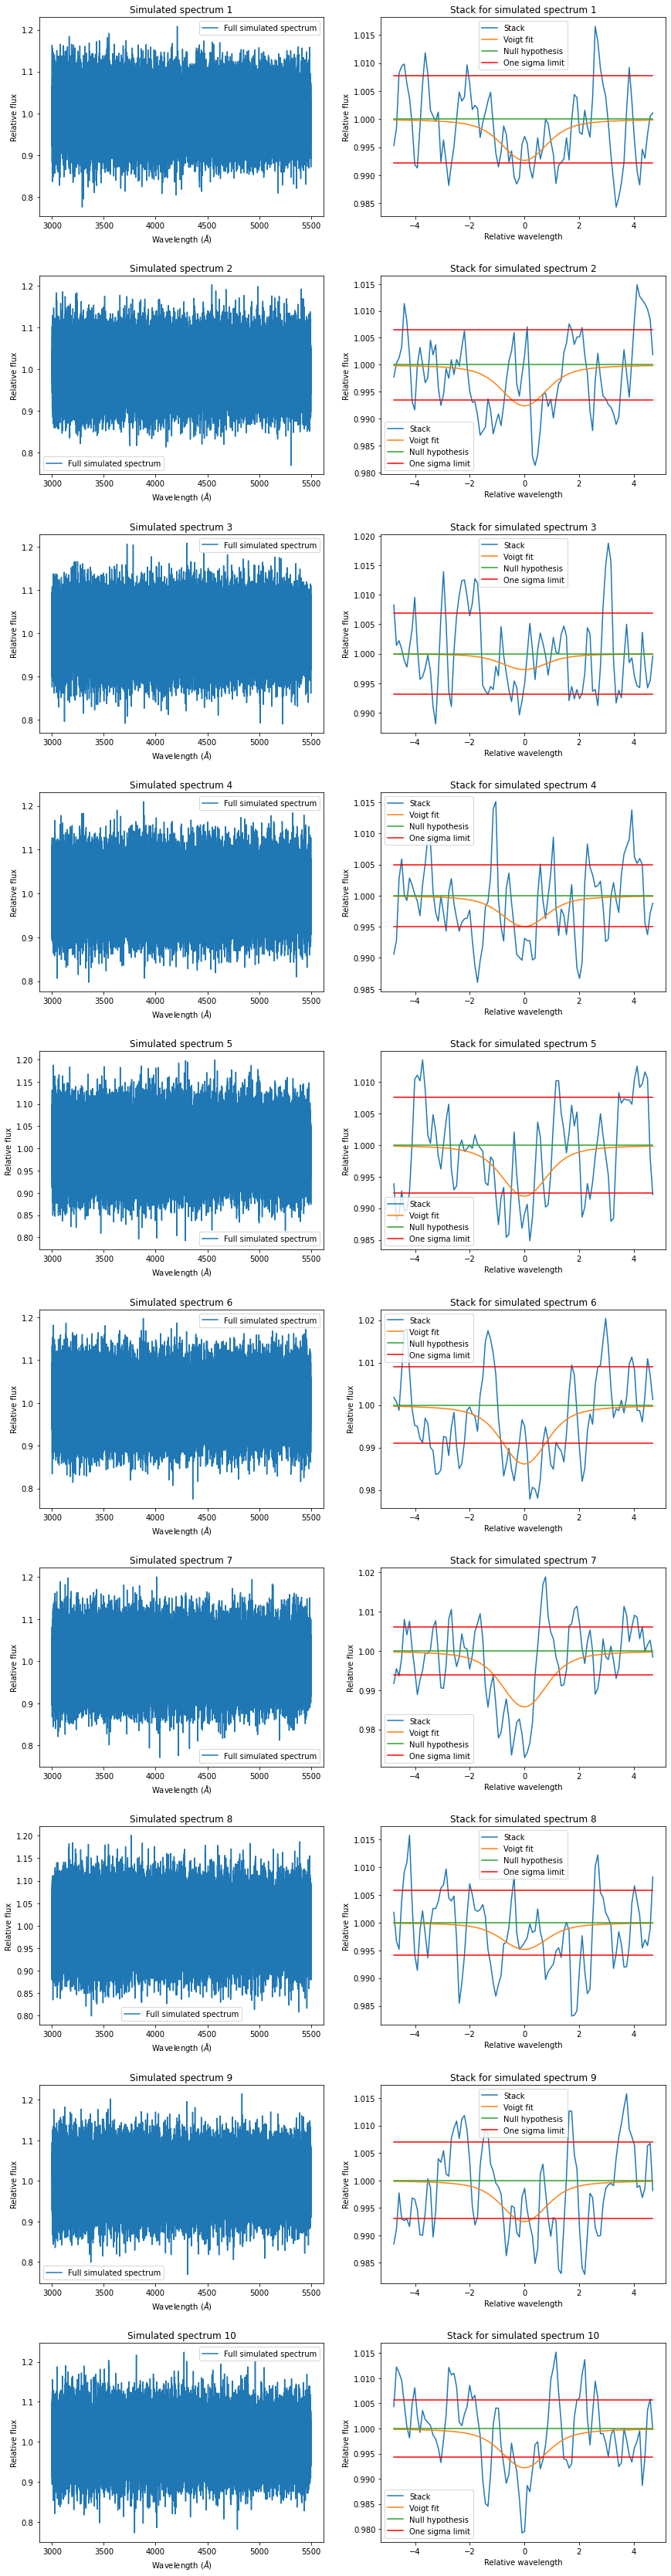

In [32]:
iters = 10

fig2, axs1 = plt.subplots(iters, 2, figsize = (12, 5*iters))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for it2 in range(iters):
    y = np.random.normal(signal, 1/SNR, x.shape)
    
    #strPeak = np.random.randint(P)
    ynew = copy.deepcopy(y)
    
    if(iters < 2):
        desax1 = axs1[0]
        desax2 = axs1[1]
    else:
        desax1 = axs1[it2, 0]
        desax2 = axs1[it2, 1]
    
    for it1 in range(P):
        fwhm1 = molParam[it1, 1]
        fL1 = 2*fwhm1/3.6013
        fG1 = 2.355*fwhm1/3.6013
        v2 = Voigt1D(x_0 = molParam[it1, 0], fwhm_L = fL1, fwhm_G = fG1)
        #print(v2(molParam[it1, 0]))
        """
        if it1 < strPeak:
            curr = np.random.randint(P)
        elif it1 == strPeak:
            curr = P
        else:
            curr = np.random.randint(P+1)
        """
        #curr = np.random.random_sample() #sets all peaks to have random relative depths (max is 1 open)
        curr = 1.0 #sets all peak depths to be equal
        ynew = ynew - 0.01*curr*v2(x)/v2(molParam[it1, 0])

    desax1.plot(x, ynew, label = 'Full simulated spectrum')
    desax1.legend()
    tit1 = 'Simulated spectrum ' + str(it2+1)
    desax1.set_title(tit1)
    desax1.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Relative flux')
    desax1.legend()
    
    data = np.array([x, ynew]).transpose()
    #print(data.shape)
    
    stack = widthNormLinStacker(data, molParam, hide = True, extent = 5)
    
    dict1 = stackCheck(stack, flatReg = [-2.5, 2.5])
    
    res1 = dict1['Voigt model']
    res2 = dict1['Null model']
    rc1 = dict1['Red chi of voigt']
    print('Reduced chi square for voigt fit (iteration ' + str(it2+1) + ') is ' + str(rc1))
    rc2 = dict1['Red chi of null']
    print('Reduced chi square for null hypothesis (iteration ' + str(it2+1) + ') is ' + str(rc2))
    BCI1 = dict1['BIC of voigt']
    print('BIC for voigt fit (iteration ' + str(it2+1) + ') is ' + str(BCI1))
    BCI2 = dict1['BIC of null']
    print('BIC for null hypothesis (iteration ' + str(it2+1) + ') is ' + str(BCI2))
    fval = dict1['f']
    print('f value is ' + str(fval))
    print('****')
    #lk = dict1['Likelihood']
    #print('Likelihood of it being a detection is ' + str(lk*100) + r'%')
    
    #suppSD = np.std(y)/np.sqrt(P)
    #print('Supposed uncertainity is ' + str(suppSD))
    #calcSD = np.std(stack[np.logical_or(stack[:, 0] > 2.5, stack[:, 0] < -2.5), 1])
    #print('Calculated uncertainity is ' + str(calcSD))
    #res = voigtUniPeak(stack, sd = calcSD, plot = 0, retMod = True, centre = 0.0, sigma = 2/3.6013)
    #print('Reduced chi square for voigt fit (iteration ' + str(it2+1) + ') is ' + str(res.redchi))
    #res2 = voigtUniPeak(stack, sd = calcSD, plot = 0, retMod = True, amp = 0.0)
    #print('Reduced chi square for null hypothesis (iteration ' + str(it2+1) + ') is ' + str(res2.redchi))
    
    #likelihood = np.exp(-res.redchi)/(np.exp(-res.redchi) + np.exp(-res2.redchi))
    #print('Likelihood of it being a detection is ' + str(likelihood*100) + r'%')
    
    desax2.plot(stack[:, 0], stack[:, 1], label = 'Stack')
    desax2.plot(stack[:, 0], (1 - res1.best_fit), label = 'Voigt fit')
    desax2.plot(stack[:, 0], (1 - res2.best_fit), label = 'Null hypothesis')
    lowerY = np.ones(stack[:, 0].shape) - np.std(stack[np.logical_or(stack[:, 0] > 2.5, stack[:, 0] < -2.5), 1])
    upperY = np.ones(stack[:, 0].shape) + np.std(stack[np.logical_or(stack[:, 0] > 2.5, stack[:, 0] < -2.5), 1])
    desax2.plot(stack[:, 0], lowerY, 'r', label = 'One sigma limit')
    desax2.plot(stack[:, 0], upperY, 'r')
    desax2.legend()
    tit2 = 'Stack for simulated spectrum ' + str(it2+1)
    desax2.set_title(tit2)
    desax2.set(xlabel = 'Relative wavelength', ylabel = 'Relative flux')
    desax2.legend()

plt.subplots_adjust(hspace=0.3, wspace=0.2)

In [12]:
#check for all SNRs for with spectra with single molecules only

SNRs = [1, 2, 5, 10, 20, 50, 100, 200, 500]
mols = ['2MethylNaphthalene', 'Acenaphthene', 'Benzoghiperylene', 'Pentacene', 'Perylene', 'Phenanthrene', 'Pyrene', 'Phenalenyl']
indIter = 10

avgLk = np.zeros((len(SNRs), len(mols)))

for it5, mol in enumerate(mols):
    parFile = PYTHONDIR + '\\utils\\Harshit\\Lab Spectra Parameters\\' + molName + 'Params.txt'
    molPar = np.loadtxt(parFile)
    peaks = molPar.shape[0]
    for it6, snr in enumerate(SNRs):
        for it3 in range(indIter):
            y = np.random.normal(signal, 1/snr, x.shape)
            ynew = copy.deepcopy(y)
            for it4 in range(peaks):
                fwhm = molPar[it4, 1]
                fL = 2*fwhm/3.6013
                fG = 2.355*fwhm/3.6013
                voi = Voigt1D(x_0 = molPar[it4, 0], fwhm_L = fL, fwhm_G = fG)
                ynew = ynew - 0.01*voi(x)/voi(molPar[it4, 0])
            
            data = np.array([x, ynew]).transpose()
            stack = widthNormLinStacker(data, molParam, hide = True, extent = 5)
            dict2 = stackCheck(stack, flatReg = [-2.5, 2.5], retMods = False)
            like = dict2['Likelihood']
            avgLk[it6, it5] = avgLk[it6, it5] + like/indIter
            print('Doing mol ' + str(it5) + ', SNR ' + str(it6))

Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 0
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 1
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 2
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 3
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 4
Doing mol 0, SNR 5
Doing mol 0, SNR 5
Doing mol 0,

Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 7
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 4, SNR 8
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 0
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 1
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 2
Doing mol 5, SNR 3
Doing mol 5, SNR 3
Doing mol 5, SNR 3
Doing mol 5, SNR 3
Doing mol 5,

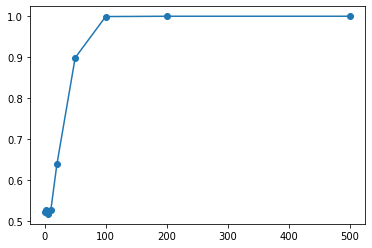

In [13]:
plt.plot(SNRs, avgLk[:, 4], 'o-')

In [14]:
print(avgLk[:, 4])

[0.52326267 0.52852197 0.51820417 0.52657826 0.63897745 0.89882884
 0.99922851 1.         1.        ]


In [23]:
#check for all SNRs for with spectra with single molecules only

SNRs = [10, 12, 14, 16, 20]
mols = ['2MethylNaphthalene', 'Acenaphthene', 'Benzoghiperylene', 'Pentacene', 'Perylene', 'Phenanthrene', 'Pyrene', 'Phenalenyl']
indIter = 30

fails = np.zeros((len(SNRs), len(mols)))

for it7, mol in enumerate(mols):
    parFile = PYTHONDIR + '\\utils\\Harshit\\Lab Spectra Parameters\\' + molName + 'Params.txt'
    molPar = np.loadtxt(parFile)
    peaks = molPar.shape[0]
    for it8, snr in enumerate(SNRs):
        for it9 in range(indIter):
            y = np.random.normal(signal, 1/snr, x.shape)
            ynew = copy.deepcopy(y)
            for it10 in range(peaks):
                fwhm = molPar[it10, 1]
                fL = 2*fwhm/3.6013
                fG = 2.355*fwhm/3.6013
                voi = Voigt1D(x_0 = molPar[it10, 0], fwhm_L = fL, fwhm_G = fG)
                ynew = ynew - 0.01*voi(x)/voi(molPar[it10, 0])
            
            data = np.array([x, ynew]).transpose()
            stack = widthNormLinStacker(data, molParam, hide = True, extent = 5)
            dict2 = stackCheck(stack, flatReg = [-2.5, 2.5], retMods = False)
            bic1 = dict2['BCI of voigt']
            bic2 = dict2['BCI of null']
            fails[it8, it7] = fails[it8, it7] + int(bic2 < bic1)
            print('Doing mol ' + str(it7) + ', SNR ' + str(it8) + ', iteration ' + str(it9))

Doing mol 0, SNR 0, iteration 0
Doing mol 0, SNR 0, iteration 1
Doing mol 0, SNR 0, iteration 2
Doing mol 0, SNR 0, iteration 3
Doing mol 0, SNR 0, iteration 4
Doing mol 0, SNR 0, iteration 5
Doing mol 0, SNR 0, iteration 6
Doing mol 0, SNR 0, iteration 7
Doing mol 0, SNR 0, iteration 8
Doing mol 0, SNR 0, iteration 9
Doing mol 0, SNR 0, iteration 10
Doing mol 0, SNR 0, iteration 11
Doing mol 0, SNR 0, iteration 12
Doing mol 0, SNR 0, iteration 13
Doing mol 0, SNR 0, iteration 14
Doing mol 0, SNR 0, iteration 15
Doing mol 0, SNR 0, iteration 16
Doing mol 0, SNR 0, iteration 17
Doing mol 0, SNR 0, iteration 18
Doing mol 0, SNR 0, iteration 19
Doing mol 0, SNR 0, iteration 20
Doing mol 0, SNR 0, iteration 21
Doing mol 0, SNR 0, iteration 22
Doing mol 0, SNR 0, iteration 23
Doing mol 0, SNR 0, iteration 24
Doing mol 0, SNR 0, iteration 25
Doing mol 0, SNR 0, iteration 26
Doing mol 0, SNR 0, iteration 27
Doing mol 0, SNR 0, iteration 28
Doing mol 0, SNR 0, iteration 29
Doing mol 0, SNR 1, 

Doing mol 1, SNR 3, iteration 11
Doing mol 1, SNR 3, iteration 12
Doing mol 1, SNR 3, iteration 13
Doing mol 1, SNR 3, iteration 14
Doing mol 1, SNR 3, iteration 15
Doing mol 1, SNR 3, iteration 16
Doing mol 1, SNR 3, iteration 17
Doing mol 1, SNR 3, iteration 18
Doing mol 1, SNR 3, iteration 19
Doing mol 1, SNR 3, iteration 20
Doing mol 1, SNR 3, iteration 21
Doing mol 1, SNR 3, iteration 22
Doing mol 1, SNR 3, iteration 23
Doing mol 1, SNR 3, iteration 24
Doing mol 1, SNR 3, iteration 25
Doing mol 1, SNR 3, iteration 26
Doing mol 1, SNR 3, iteration 27
Doing mol 1, SNR 3, iteration 28
Doing mol 1, SNR 3, iteration 29
Doing mol 1, SNR 4, iteration 0
Doing mol 1, SNR 4, iteration 1
Doing mol 1, SNR 4, iteration 2
Doing mol 1, SNR 4, iteration 3
Doing mol 1, SNR 4, iteration 4
Doing mol 1, SNR 4, iteration 5
Doing mol 1, SNR 4, iteration 6
Doing mol 1, SNR 4, iteration 7
Doing mol 1, SNR 4, iteration 8
Doing mol 1, SNR 4, iteration 9
Doing mol 1, SNR 4, iteration 10
Doing mol 1, SNR 4, 

Doing mol 3, SNR 1, iteration 22
Doing mol 3, SNR 1, iteration 23
Doing mol 3, SNR 1, iteration 24
Doing mol 3, SNR 1, iteration 25
Doing mol 3, SNR 1, iteration 26
Doing mol 3, SNR 1, iteration 27
Doing mol 3, SNR 1, iteration 28
Doing mol 3, SNR 1, iteration 29
Doing mol 3, SNR 2, iteration 0
Doing mol 3, SNR 2, iteration 1
Doing mol 3, SNR 2, iteration 2
Doing mol 3, SNR 2, iteration 3
Doing mol 3, SNR 2, iteration 4
Doing mol 3, SNR 2, iteration 5
Doing mol 3, SNR 2, iteration 6
Doing mol 3, SNR 2, iteration 7
Doing mol 3, SNR 2, iteration 8
Doing mol 3, SNR 2, iteration 9
Doing mol 3, SNR 2, iteration 10
Doing mol 3, SNR 2, iteration 11
Doing mol 3, SNR 2, iteration 12
Doing mol 3, SNR 2, iteration 13
Doing mol 3, SNR 2, iteration 14
Doing mol 3, SNR 2, iteration 15
Doing mol 3, SNR 2, iteration 16
Doing mol 3, SNR 2, iteration 17
Doing mol 3, SNR 2, iteration 18
Doing mol 3, SNR 2, iteration 19
Doing mol 3, SNR 2, iteration 20
Doing mol 3, SNR 2, iteration 21
Doing mol 3, SNR 2, 

Doing mol 5, SNR 0, iteration 3
Doing mol 5, SNR 0, iteration 4
Doing mol 5, SNR 0, iteration 5
Doing mol 5, SNR 0, iteration 6
Doing mol 5, SNR 0, iteration 7
Doing mol 5, SNR 0, iteration 8
Doing mol 5, SNR 0, iteration 9
Doing mol 5, SNR 0, iteration 10
Doing mol 5, SNR 0, iteration 11
Doing mol 5, SNR 0, iteration 12
Doing mol 5, SNR 0, iteration 13
Doing mol 5, SNR 0, iteration 14
Doing mol 5, SNR 0, iteration 15
Doing mol 5, SNR 0, iteration 16
Doing mol 5, SNR 0, iteration 17
Doing mol 5, SNR 0, iteration 18
Doing mol 5, SNR 0, iteration 19
Doing mol 5, SNR 0, iteration 20
Doing mol 5, SNR 0, iteration 21
Doing mol 5, SNR 0, iteration 22
Doing mol 5, SNR 0, iteration 23
Doing mol 5, SNR 0, iteration 24
Doing mol 5, SNR 0, iteration 25
Doing mol 5, SNR 0, iteration 26
Doing mol 5, SNR 0, iteration 27
Doing mol 5, SNR 0, iteration 28
Doing mol 5, SNR 0, iteration 29
Doing mol 5, SNR 1, iteration 0
Doing mol 5, SNR 1, iteration 1
Doing mol 5, SNR 1, iteration 2
Doing mol 5, SNR 1, 

Doing mol 6, SNR 3, iteration 14
Doing mol 6, SNR 3, iteration 15
Doing mol 6, SNR 3, iteration 16
Doing mol 6, SNR 3, iteration 17
Doing mol 6, SNR 3, iteration 18
Doing mol 6, SNR 3, iteration 19
Doing mol 6, SNR 3, iteration 20
Doing mol 6, SNR 3, iteration 21
Doing mol 6, SNR 3, iteration 22
Doing mol 6, SNR 3, iteration 23
Doing mol 6, SNR 3, iteration 24
Doing mol 6, SNR 3, iteration 25
Doing mol 6, SNR 3, iteration 26
Doing mol 6, SNR 3, iteration 27
Doing mol 6, SNR 3, iteration 28
Doing mol 6, SNR 3, iteration 29
Doing mol 6, SNR 4, iteration 0
Doing mol 6, SNR 4, iteration 1
Doing mol 6, SNR 4, iteration 2
Doing mol 6, SNR 4, iteration 3
Doing mol 6, SNR 4, iteration 4
Doing mol 6, SNR 4, iteration 5
Doing mol 6, SNR 4, iteration 6
Doing mol 6, SNR 4, iteration 7
Doing mol 6, SNR 4, iteration 8
Doing mol 6, SNR 4, iteration 9
Doing mol 6, SNR 4, iteration 10
Doing mol 6, SNR 4, iteration 11
Doing mol 6, SNR 4, iteration 12
Doing mol 6, SNR 4, iteration 13
Doing mol 6, SNR 4, 

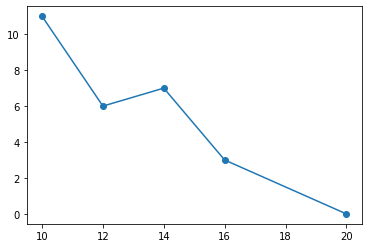

In [24]:
plt.plot(SNRs, fails[:, 5], 'o-')

In [25]:
fails

array([[ 7.,  6.,  8., 11., 13., 11., 11., 11.],
       [10.,  8.,  9.,  9.,  7.,  6.,  8., 10.],
       [ 5.,  5.,  8.,  3.,  5.,  7.,  5.,  9.],
       [ 4.,  3.,  1.,  2.,  7.,  3.,  2.,  2.],
       [ 2.,  0.,  1.,  1.,  1.,  0.,  0.,  1.]])

In [26]:
np.sum(fails, axis = 1)/(len(mols)*indIter)

array([0.325     , 0.27916667, 0.19583333, 0.1       , 0.025     ])

In [27]:
#check for all SNRs for with spectra with single molecules only

SNRs = [20, 30, 40, 50]
mols = ['2MethylNaphthalene', 'Acenaphthene', 'Benzoghiperylene', 'Pentacene', 'Perylene', 'Phenanthrene', 'Pyrene', 'Phenalenyl']
indIter = 30

fails2 = np.zeros((len(SNRs), len(mols)))

for it7, mol in enumerate(mols):
    parFile = PYTHONDIR + '\\utils\\Harshit\\Lab Spectra Parameters\\' + molName + 'Params.txt'
    molPar = np.loadtxt(parFile)
    peaks = molPar.shape[0]
    for it8, snr in enumerate(SNRs):
        for it9 in range(indIter):
            y = np.random.normal(signal, 1/snr, x.shape)
            ynew = copy.deepcopy(y)
            for it10 in range(peaks):
                fwhm = molPar[it10, 1]
                fL = 2*fwhm/3.6013
                fG = 2.355*fwhm/3.6013
                voi = Voigt1D(x_0 = molPar[it10, 0], fwhm_L = fL, fwhm_G = fG)
                ynew = ynew - 0.01*voi(x)/voi(molPar[it10, 0])
            
            data = np.array([x, ynew]).transpose()
            stack = widthNormLinStacker(data, molParam, hide = True, extent = 5)
            dict2 = stackCheck(stack, flatReg = [-2.5, 2.5], retMods = False)
            bic1 = dict2['BCI of voigt']
            bic2 = dict2['BCI of null']
            fails2[it8, it7] = fails2[it8, it7] + int(bic2 < bic1)
            print('Doing mol ' + str(it7) + ', SNR ' + str(it8) + ', iteration ' + str(it9))

Doing mol 0, SNR 0, iteration 0
Doing mol 0, SNR 0, iteration 1
Doing mol 0, SNR 0, iteration 2
Doing mol 0, SNR 0, iteration 3
Doing mol 0, SNR 0, iteration 4
Doing mol 0, SNR 0, iteration 5
Doing mol 0, SNR 0, iteration 6
Doing mol 0, SNR 0, iteration 7
Doing mol 0, SNR 0, iteration 8
Doing mol 0, SNR 0, iteration 9
Doing mol 0, SNR 0, iteration 10
Doing mol 0, SNR 0, iteration 11
Doing mol 0, SNR 0, iteration 12
Doing mol 0, SNR 0, iteration 13
Doing mol 0, SNR 0, iteration 14
Doing mol 0, SNR 0, iteration 15
Doing mol 0, SNR 0, iteration 16
Doing mol 0, SNR 0, iteration 17
Doing mol 0, SNR 0, iteration 18
Doing mol 0, SNR 0, iteration 19
Doing mol 0, SNR 0, iteration 20
Doing mol 0, SNR 0, iteration 21
Doing mol 0, SNR 0, iteration 22
Doing mol 0, SNR 0, iteration 23
Doing mol 0, SNR 0, iteration 24
Doing mol 0, SNR 0, iteration 25
Doing mol 0, SNR 0, iteration 26
Doing mol 0, SNR 0, iteration 27
Doing mol 0, SNR 0, iteration 28
Doing mol 0, SNR 0, iteration 29
Doing mol 0, SNR 1, 

Doing mol 2, SNR 0, iteration 11
Doing mol 2, SNR 0, iteration 12
Doing mol 2, SNR 0, iteration 13
Doing mol 2, SNR 0, iteration 14
Doing mol 2, SNR 0, iteration 15
Doing mol 2, SNR 0, iteration 16
Doing mol 2, SNR 0, iteration 17
Doing mol 2, SNR 0, iteration 18
Doing mol 2, SNR 0, iteration 19
Doing mol 2, SNR 0, iteration 20
Doing mol 2, SNR 0, iteration 21
Doing mol 2, SNR 0, iteration 22
Doing mol 2, SNR 0, iteration 23
Doing mol 2, SNR 0, iteration 24
Doing mol 2, SNR 0, iteration 25
Doing mol 2, SNR 0, iteration 26
Doing mol 2, SNR 0, iteration 27
Doing mol 2, SNR 0, iteration 28
Doing mol 2, SNR 0, iteration 29
Doing mol 2, SNR 1, iteration 0
Doing mol 2, SNR 1, iteration 1
Doing mol 2, SNR 1, iteration 2
Doing mol 2, SNR 1, iteration 3
Doing mol 2, SNR 1, iteration 4
Doing mol 2, SNR 1, iteration 5
Doing mol 2, SNR 1, iteration 6
Doing mol 2, SNR 1, iteration 7
Doing mol 2, SNR 1, iteration 8
Doing mol 2, SNR 1, iteration 9
Doing mol 2, SNR 1, iteration 10
Doing mol 2, SNR 1, 

Doing mol 4, SNR 0, iteration 22
Doing mol 4, SNR 0, iteration 23
Doing mol 4, SNR 0, iteration 24
Doing mol 4, SNR 0, iteration 25
Doing mol 4, SNR 0, iteration 26
Doing mol 4, SNR 0, iteration 27
Doing mol 4, SNR 0, iteration 28
Doing mol 4, SNR 0, iteration 29
Doing mol 4, SNR 1, iteration 0
Doing mol 4, SNR 1, iteration 1
Doing mol 4, SNR 1, iteration 2
Doing mol 4, SNR 1, iteration 3
Doing mol 4, SNR 1, iteration 4
Doing mol 4, SNR 1, iteration 5
Doing mol 4, SNR 1, iteration 6
Doing mol 4, SNR 1, iteration 7
Doing mol 4, SNR 1, iteration 8
Doing mol 4, SNR 1, iteration 9
Doing mol 4, SNR 1, iteration 10
Doing mol 4, SNR 1, iteration 11
Doing mol 4, SNR 1, iteration 12
Doing mol 4, SNR 1, iteration 13
Doing mol 4, SNR 1, iteration 14
Doing mol 4, SNR 1, iteration 15
Doing mol 4, SNR 1, iteration 16
Doing mol 4, SNR 1, iteration 17
Doing mol 4, SNR 1, iteration 18
Doing mol 4, SNR 1, iteration 19
Doing mol 4, SNR 1, iteration 20
Doing mol 4, SNR 1, iteration 21
Doing mol 4, SNR 1, 

Doing mol 6, SNR 1, iteration 3
Doing mol 6, SNR 1, iteration 4
Doing mol 6, SNR 1, iteration 5
Doing mol 6, SNR 1, iteration 6
Doing mol 6, SNR 1, iteration 7
Doing mol 6, SNR 1, iteration 8
Doing mol 6, SNR 1, iteration 9
Doing mol 6, SNR 1, iteration 10
Doing mol 6, SNR 1, iteration 11
Doing mol 6, SNR 1, iteration 12
Doing mol 6, SNR 1, iteration 13
Doing mol 6, SNR 1, iteration 14
Doing mol 6, SNR 1, iteration 15
Doing mol 6, SNR 1, iteration 16
Doing mol 6, SNR 1, iteration 17
Doing mol 6, SNR 1, iteration 18
Doing mol 6, SNR 1, iteration 19
Doing mol 6, SNR 1, iteration 20
Doing mol 6, SNR 1, iteration 21
Doing mol 6, SNR 1, iteration 22
Doing mol 6, SNR 1, iteration 23
Doing mol 6, SNR 1, iteration 24
Doing mol 6, SNR 1, iteration 25
Doing mol 6, SNR 1, iteration 26
Doing mol 6, SNR 1, iteration 27
Doing mol 6, SNR 1, iteration 28
Doing mol 6, SNR 1, iteration 29
Doing mol 6, SNR 2, iteration 0
Doing mol 6, SNR 2, iteration 1
Doing mol 6, SNR 2, iteration 2
Doing mol 6, SNR 2, 

In [28]:
fails2

array([[2., 1., 1., 1., 1., 2., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])